<a href="https://colab.research.google.com/github/anshul7409/codsoft/blob/main/Task2_movie_rating_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Movie data processing

In [2]:
df_movie = pd.read_csv('/content/movies.csv',sep="::",engine = 'python')

df_movie

,MovieIDS,MovieName,Genre
0,1,Toy Story (1995),"Animation|Children's|Comedy,,,"
1,2,Jumanji (1995),"Adventure|Children's|Fantasy,,,"
2,3,Grumpier Old Men (1995),"Comedy|Romance,,,"
3,4,Waiting to Exhale (1995),"Comedy|Drama,,,"
4,5,Father of the Bride Part II (1995),"Comedy,,,"
...,...,...,...
3878,3948,Meet the Parents (2000),"Comedy,,,"
3879,3949,Requiem for a Dream (2000),"Drama,,,"
3880,3950,Tigerland (2000),"Drama,,,"
3881,3951,Two Family House (2000),"Drama,,,"


In [3]:
df_movie.describe()

,MovieIDS
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [4]:
df_movie.shape

(3883, 3)

In [5]:
df_movie.isna().sum()

MovieIDS     0
MovieName    0
Genre        0
dtype: int64

**rating** **data**

In [6]:
df_ratings = pd.read_csv("/content/ratings.csv",sep="::",engine="python")

df_ratings.head(10)

,UserId,MovieID,Ratings,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [7]:
df_ratings.shape

(1000209, 4)

In [8]:
df_ratings.describe()

,UserId,MovieID,Ratings,Timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [9]:
df_ratings.fillna(df_ratings["Timestamp"].mean(),inplace = True)

In [10]:
df_ratings.isna().sum()

UserId       0
MovieID      0
Ratings      0
Timestamp    0
dtype: int64

User_data

In [11]:
df_users= pd.read_csv("/content/users.csv",sep="::",engine="python")
df_users.head()

,UserID,Gender,Age,Occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [12]:
df_users.shape

(6040, 5)

In [13]:
df_users.describe()

,UserID,Age,Occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [14]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_users['Gender'] = labelencoder.fit_transform(df_users['Gender'])
df_users.head()

,UserID,Gender,Age,Occupation,zip-code
0,1,0,1,10,48067
1,2,1,56,16,70072
2,3,1,25,15,55117
3,4,1,45,7,02460
4,5,1,25,20,55455


In [15]:
df_users.isna().sum()

UserID        0
Gender        0
Age           0
Occupation    0
zip-code      0
dtype: int64

CONCATINETING THE DATASETS

In [16]:
df_data = pd.concat([df_movie,df_ratings,df_users],axis = 1)
df_data.dropna()
df_data.head(10)

,MovieIDS,MovieName,Genre,UserId,MovieID,Ratings,Timestamp,UserID,Gender,Age,Occupation,zip-code
0,1.0,Toy Story (1995),"Animation|Children's|Comedy,,,",1,1193,5,978300760,1.0,0.0,1.0,10.0,48067
1,2.0,Jumanji (1995),"Adventure|Children's|Fantasy,,,",1,661,3,978302109,2.0,1.0,56.0,16.0,70072
2,3.0,Grumpier Old Men (1995),"Comedy|Romance,,,",1,914,3,978301968,3.0,1.0,25.0,15.0,55117
3,4.0,Waiting to Exhale (1995),"Comedy|Drama,,,",1,3408,4,978300275,4.0,1.0,45.0,7.0,02460
4,5.0,Father of the Bride Part II (1995),"Comedy,,,",1,2355,5,978824291,5.0,1.0,25.0,20.0,55455
5,6.0,Heat (1995),"Action|Crime|Thriller,,,",1,1197,3,978302268,6.0,0.0,50.0,9.0,55117
6,7.0,Sabrina (1995),"Comedy|Romance,,,",1,1287,5,978302039,7.0,1.0,35.0,1.0,06810
7,8.0,Tom and Huck (1995),"Adventure|Children's,,,",1,2804,5,978300719,8.0,1.0,25.0,12.0,11413
8,9.0,Sudden Death (1995),"Action,,,",1,594,4,978302268,9.0,1.0,25.0,17.0,61614
9,10.0,GoldenEye (1995),"Action|Adventure|Thriller,,,",1,919,4,978301368,10.0,0.0,35.0,1.0,95370


In [17]:
df_data.shape

(1000209, 12)

Removing Unnecessary column

In [18]:
df2 = df_data.drop(["Occupation","zip-code","Timestamp"],axis = 1)
df2.head()

,MovieIDS,MovieName,Genre,UserId,MovieID,Ratings,UserID,Gender,Age
0,1.0,Toy Story (1995),"Animation|Children's|Comedy,,,",1,1193,5,1.0,0.0,1.0
1,2.0,Jumanji (1995),"Adventure|Children's|Fantasy,,,",1,661,3,2.0,1.0,56.0
2,3.0,Grumpier Old Men (1995),"Comedy|Romance,,,",1,914,3,3.0,1.0,25.0
3,4.0,Waiting to Exhale (1995),"Comedy|Drama,,,",1,3408,4,4.0,1.0,45.0
4,5.0,Father of the Bride Part II (1995),"Comedy,,,",1,2355,5,5.0,1.0,25.0


In [19]:
df2.isna().sum()

MovieIDS     996326
MovieName    996326
Genre        996326
UserId            0
MovieID           0
Ratings           0
UserID       994169
Gender       994169
Age          994169
dtype: int64

removing missing rows

In [20]:
df_final = df2.dropna()

In [21]:
df_final.shape

(3883, 9)

**VISUALIZING THE DATA**

<Axes: xlabel='Gender', ylabel='count'>

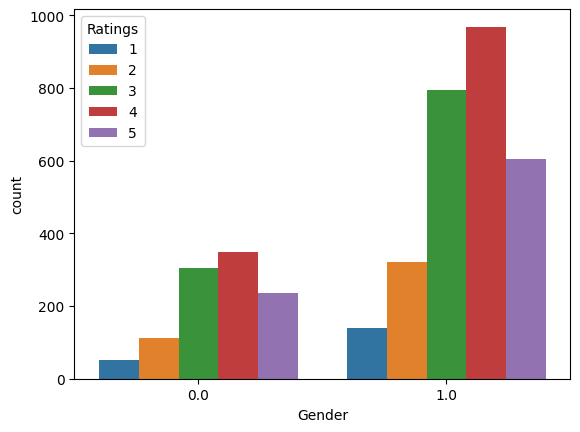

In [22]:
sns.countplot(x = df_final["Gender"],hue=df_final["Ratings"])

Text(0, 0.5, 'Ratings')

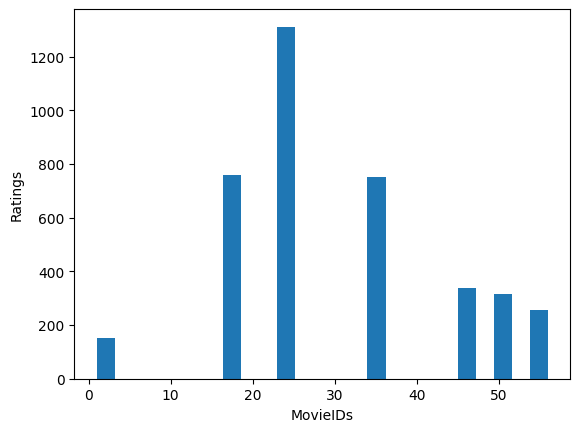

In [23]:
df_final.Age.plot.hist(bins = 25)
plt.xlabel("MovieIDs")
plt.ylabel("Ratings")

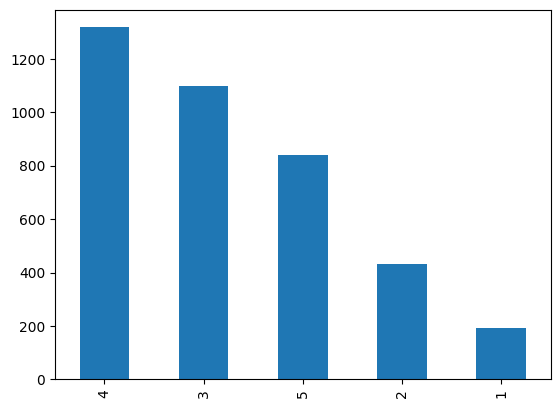

In [24]:
df_final["Ratings"].value_counts().plot(kind = 'bar')
plt.show()

Text(0, 0.5, 'Ratings')

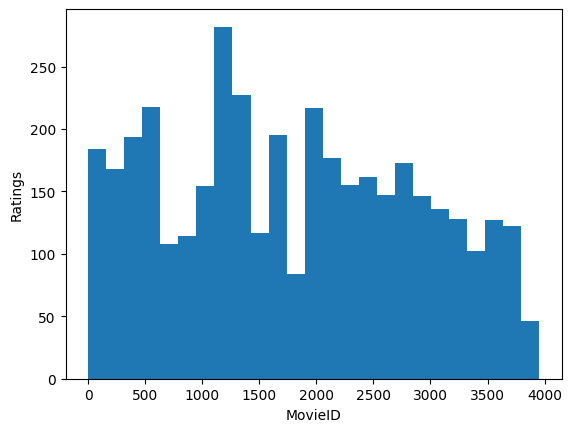

In [25]:
df_final["MovieID"].plot.hist(bins = 25)
plt.xlabel("MovieID")
plt.ylabel("Ratings")

<Axes: ylabel='Frequency'>

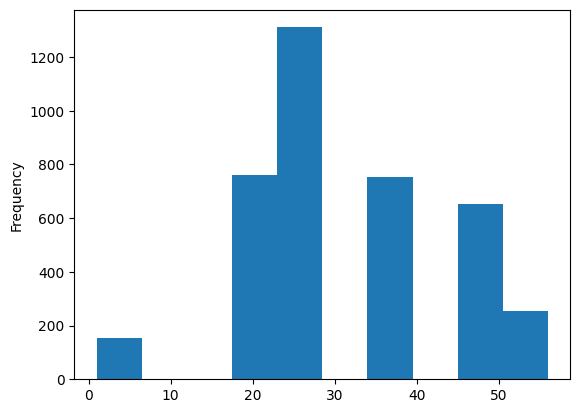

In [26]:
df_final["Age"].plot.hist(bins = 10)

<Axes: xlabel='Age', ylabel='count'>

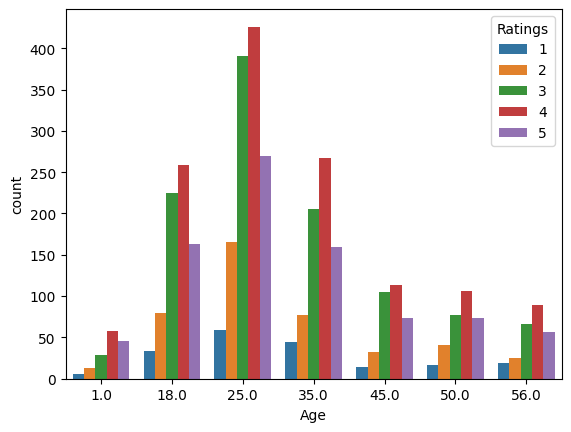

In [27]:
sns.countplot(x = df_final["Age"],hue = df_final["Ratings"])

In [28]:
df_final.head()

,MovieIDS,MovieName,Genre,UserId,MovieID,Ratings,UserID,Gender,Age
0,1.0,Toy Story (1995),"Animation|Children's|Comedy,,,",1,1193,5,1.0,0.0,1.0
1,2.0,Jumanji (1995),"Adventure|Children's|Fantasy,,,",1,661,3,2.0,1.0,56.0
2,3.0,Grumpier Old Men (1995),"Comedy|Romance,,,",1,914,3,3.0,1.0,25.0
3,4.0,Waiting to Exhale (1995),"Comedy|Drama,,,",1,3408,4,4.0,1.0,45.0
4,5.0,Father of the Bride Part II (1995),"Comedy,,,",1,2355,5,5.0,1.0,25.0


In [29]:
input = df_final.drop(['Ratings','MovieName','Genre','MovieID'],axis = 1)
target = df_final['Ratings']

In [30]:
target.head()

0    5
1    3
2    3
3    4
4    5
Name: Ratings, dtype: int64

In [31]:
input.head()

,MovieIDS,UserId,UserID,Gender,Age
0,1.0,1,1.0,0.0,1.0
1,2.0,1,2.0,1.0,56.0
2,3.0,1,3.0,1.0,25.0
3,4.0,1,4.0,1.0,45.0
4,5.0,1,5.0,1.0,25.0


TRAINING THE MODEL

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(input)
scaled_df = pd.DataFrame(scaled_data,columns=input.columns)
scaled_df.head()

,MovieIDS,UserId,UserID,Gender,Age
0,0.000000,0.0,0.000000,0.0,0.000000
1,0.000253,0.0,0.000258,1.0,1.000000
2,0.000506,0.0,0.000515,1.0,0.436364
3,0.000759,0.0,0.000773,1.0,0.800000
4,0.001012,0.0,0.001030,1.0,0.436364


In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(input,target,test_size=0.3)

In [34]:
print(Y_train)

3064    3
1943    4
2443    4
1175    5
1999    5
       ..
2048    5
2499    2
389     4
3325    3
2206    2
Name: Ratings, Length: 2718, dtype: int64


In [35]:
print(Y_test)

1543    3
3796    5
2509    4
2202    5
3368    3
       ..
1262    5
3710    5
821     4
2277    4
2501    3
Name: Ratings, Length: 1165, dtype: int64


In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
X_test = np.array(X_test)

In [38]:
model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([4, 3, 4, ..., 4, 4, 4])

In [39]:
print(Y_test)

1543    3
3796    5
2509    4
2202    5
3368    3
       ..
1262    5
3710    5
821     4
2277    4
2501    3
Name: Ratings, Length: 1165, dtype: int64


In [42]:
input.head()

,MovieIDS,UserId,UserID,Gender,Age
0,1.0,1,1.0,0.0,1.0
1,2.0,1,2.0,1.0,56.0
2,3.0,1,3.0,1.0,25.0
3,4.0,1,4.0,1.0,45.0
4,5.0,1,5.0,1.0,25.0


In [43]:
sample_input = X_test[:5]
predicted_ratings = model.predict(sample_input)

for idx, prediction in enumerate(predicted_ratings):
    print(f"Predicted Rating for sample {idx + 1}: {prediction:.2f}")
    print(f"Actual Rating for sample {idx + 1}: {Y_test.iloc[idx]:.2f}\n")

Predicted Rating for sample 1: 4.00
Actual Rating for sample 1: 3.00

Predicted Rating for sample 2: 3.00
Actual Rating for sample 2: 5.00

Predicted Rating for sample 3: 4.00
Actual Rating for sample 3: 4.00

Predicted Rating for sample 4: 4.00
Actual Rating for sample 4: 5.00

Predicted Rating for sample 5: 4.00
Actual Rating for sample 5: 3.00



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
